In [1]:
import pandas as pd
import numpy as np

In [2]:
# 네이버 지도 크롤링을 통해 수집한 리뷰 데이터(총 1546개)
naver = pd.read_csv('네이버 지도_한개씩.csv')
naver.drop(columns = ['Unnamed: 0'], inplace=True)
naver

,Unnamed: 0,name,review
0,0,달달잠,최고의 숙소였어요!:D 어린이날연휴에 2층독채에 어른6명 아이5명 총11명이 함께했...
1,1,달달잠,아빠 생신이여서 가족여행을 다녀왔어요.총 11명이 이용했는데 방이 많아서나눠서 이용...
2,2,달달잠,10인이 이용하였는데 전부 만족했던 숙소입니다한옥마을에서 좀 걸어가야되긴한데오히려 ...
3,3,달달잠,2박3일동안 너무 잘지내다 왔어요❤️사장님 너무 친절하시고 입실시간맞춰 주차자리 마...
4,4,달달잠,독채지만 방이 다섯개다보니 잠자리가 편하더라구요..3가족이 갓는데 밥마다 화장실이 ...
...,...,...,...
1541,1541,햇살가득,아이 유치원 졸업여행으로 오랬만에 전주 한옥마을에 왔어요. 사진으로 봤을때도 다른 ...
1542,1542,햇살가득,전주한옥마을 감성숙소 새로오픈한 곳이라고 해서 1박 하고 다녀왔어요 공간도 넓고 예...
1543,1543,햇살가득,"정말 너무너무 좋았어요! 햇살도 잘 들고, 차 소리 없는 조용한 환경에 새소리 지저..."
1544,1544,햇살가득,숙소 곳곳에 있는 초록초록한 식물이랑 원목 가구 소품들이 잘 어우러져서 예쁘고 사진...


In [4]:
# 구글 API를 이용해 수집한 리뷰 데이터
google = pd.read_csv('google_review.csv')
google

,name,rating,review
0,달달잠,4,2층 독채로 쓰면 친구들이랑 가기 좋다. 화장실이 많아서 싸울 일이 없으니까. 위치...
1,달달잠,5,아주머니가 정말 친절하시고 한옥마을에서 좀 떨어져 있어서 조용해요
2,달달잠,4,NaN
3,달달잠,5,NaN
4,달달잠,3,NaN
...,...,...,...
498,햇살가득,5,방이 깨끗하고 조용해서 좋고 주인 아주머니\n너무 친절하셔서 잘 쉬고 왔어요.\n다...
499,햇살가득,4,방이 따닥따닥 붙어있어..방음이 전혀 안되는거 말고는 괜찮았어요..방도 따듯하고..
500,햇살가득,2,가격대비 잠자리가 별로 ㅠ.. 날개미 짱 마니 나옴...ㅜㅜ 그나마 사장님이 친절하...
501,햇살가득,5,사장님 친절하시고\n깔끔합니다.\n좋아요!


In [5]:
google.dropna(inplace=True) # 결측치 제거
google['review'] = google['review'].str.replace('\\n', '') # 줄바꿈 표시 제거

google # 총 464개

,name,rating,review
0,달달잠,4,2층 독채로 쓰면 친구들이랑 가기 좋다. 화장실이 많아서 싸울 일이 없으니까. 위치...
1,달달잠,5,아주머니가 정말 친절하시고 한옥마을에서 좀 떨어져 있어서 조용해요
5,이가한옥,5,너무 좋았고 사장님이 친절하셨어요 근처 맛집도 다 알려주시고 정말 좋은 숙소였던거 같아요
6,이가한옥,1,숙박 얼만지 전화해서 물어보니까 검색하면 나오는거 왜물어보냐고 불쾌해하시는데\n목소...
7,이가한옥,3,건축물은 좋음 위치도 한옥마을 라한호텔(구리베라호텔) 맞은편이라 구보이동 좋음\...
...,...,...,...
498,햇살가득,5,방이 깨끗하고 조용해서 좋고 주인 아주머니\n너무 친절하셔서 잘 쉬고 왔어요.\n다...
499,햇살가득,4,방이 따닥따닥 붙어있어..방음이 전혀 안되는거 말고는 괜찮았어요..방도 따듯하고..
500,햇살가득,2,가격대비 잠자리가 별로 ㅠ.. 날개미 짱 마니 나옴...ㅜㅜ 그나마 사장님이 친절하...
501,햇살가득,5,사장님 친절하시고\n깔끔합니다.\n좋아요!


In [7]:
# 카카오맵 크롤링을 통해 수집한 리뷰 데이터
kakao = pd.read_csv('전주.csv')
kakao

,name,score,address,review
0,나비잠한옥호텔,4.5,전주시 완산구 팔달로 150-17,['침구상태가 최상은 아니었어요. 또 휴지가 욕실에만 있고 객실에는 없어서 불편한 ...
1,한옥호텔궁,3.6,전주시 완산구 풍남문4길 25-19,['평일이라 룸 업그레이드도 받고 정말 조용하게 편하게 쉬었다 왔습니다. 룸 컨디션...
2,이가한옥,3.9,전주시 완산구 간납로 8,['숙소가 한옥이라 분위기 있음.작지만 뒷편에 주차장도 있음.샤워기 수압 쎄고 따뜻...
3,정가한옥,3.8,전주시 완산구 기린대로 78-3,['어떤 방이 30분 넘게 시끄러워서 퇴실 시간인 줄 알았는데 새벽 0시 50분.....
4,라온한옥꿀잠,4.3,전주시 완산구 한지길 99-6,[]
...,...,...,...,...
104,해오름펜션,0.0,전주시 완산구 전주천동로 52,[' ']
105,행복헌,0.0,전주시 완산구 은행로 83-20,[' ']
106,두울나비랑,0.0,전주시 완산구 향교길 97-16,[' ']
107,행진게스트하우스,5.0,전주시 완산구 향교길 155-20,"['내집처럼 편안하고 바로 근처에 향교, 전주천, 생태원 등 산책하기 좋은 곳이 많..."


In [8]:
kakao.drop(columns=['address'], inplace=True) # 필요없는 컬럼 제거
kakao.rename(columns = {'score':'rating'}, inplace=True) # 컬럼 이름 통일
kakao

,name,rating,review
0,나비잠한옥호텔,4.5,['침구상태가 최상은 아니었어요. 또 휴지가 욕실에만 있고 객실에는 없어서 불편한 ...
1,한옥호텔궁,3.6,['평일이라 룸 업그레이드도 받고 정말 조용하게 편하게 쉬었다 왔습니다. 룸 컨디션...
2,이가한옥,3.9,['숙소가 한옥이라 분위기 있음.작지만 뒷편에 주차장도 있음.샤워기 수압 쎄고 따뜻...
3,정가한옥,3.8,['어떤 방이 30분 넘게 시끄러워서 퇴실 시간인 줄 알았는데 새벽 0시 50분.....
4,라온한옥꿀잠,4.3,[]
...,...,...,...
104,해오름펜션,0.0,[' ']
105,행복헌,0.0,[' ']
106,두울나비랑,0.0,[' ']
107,행진게스트하우스,5.0,"['내집처럼 편안하고 바로 근처에 향교, 전주천, 생태원 등 산책하기 좋은 곳이 많..."


In [9]:
kakao['review'] = kakao['review'].str.replace('[', '').str.replace(']','').str.split("'") # 필요없는 특수문자 제거

C:\Users\user\AppData\Local\Temp\ipykernel_19136\2500596249.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  kakao['review'] = kakao['review'].str.replace('[', '').str.replace(']','').str.split("'")


In [10]:
kakao['review']

0      [, 침구상태가 최상은 아니었어요. 또 휴지가 욕실에만 있고 객실에는 없어서 불편한...
1      [, 평일이라 룸 업그레이드도 받고 정말 조용하게 편하게 쉬었다 왔습니다. 룸 컨디...
2      [, 숙소가 한옥이라 분위기 있음.작지만 뒷편에 주차장도 있음.샤워기 수압 쎄고 따...
3      [, 어떤 방이 30분 넘게 시끄러워서 퇴실 시간인 줄 알았는데 새벽 0시 50분....
4                                                     []
                             ...                        
104                                              [,  , ]
105                                              [,  , ]
106                                              [,  , ]
107    [, 내집처럼 편안하고 바로 근처에 향교, 전주천, 생태원 등 산책하기 좋은 곳이 ...
108                                              [,  , ]
Name: review, Length: 109, dtype: object

In [11]:
# 한 줄에 리뷰가 하나씩 나타나도록 수정
names=[]
review=[]
for idx, row in kakao.iterrows():
    if row['review'] == [' ']:
        names.append(row['name'])
        review.append(np.nan)
    for i in row['review']:
        names.append(row['name'])
        review.append(i)

In [12]:
kakao = pd.DataFrame({'name':names,'review':review})
kakao

,name,review
0,나비잠한옥호텔,
1,나비잠한옥호텔,침구상태가 최상은 아니었어요. 또 휴지가 욕실에만 있고 객실에는 없어서 불편한 점이...
2,나비잠한옥호텔,","
3,나비잠한옥호텔,친절하시고 침대가 생각보다 아주 편합니다. 방도 굉장히 깨끗하구요
4,나비잠한옥호텔,
...,...,...
428,행진게스트하우스,"내집처럼 편안하고 바로 근처에 향교, 전주천, 생태원 등 산책하기 좋은 곳이 많아요."
429,행진게스트하우스,
430,공감,
431,공감,


In [13]:
kakao['review'] = kakao['review'].str.replace(",", "") # 제거되지 않은 , 삭제 
kakao = kakao.replace('', np.nan).replace(' ', np.nan) # 빈칸은 결측치 NaN 으로 대체

In [15]:
kakao.dropna(inplace=True) # 결측치 제거

In [16]:
kakao # 최종 124개

,name,review
1,나비잠한옥호텔,침구상태가 최상은 아니었어요. 또 휴지가 욕실에만 있고 객실에는 없어서 불편한 점이...
3,나비잠한옥호텔,친절하시고 침대가 생각보다 아주 편합니다. 방도 굉장히 깨끗하구요
6,한옥호텔궁,평일이라 룸 업그레이드도 받고 정말 조용하게 편하게 쉬었다 왔습니다. 룸 컨디션도 ...
9,이가한옥,숙소가 한옥이라 분위기 있음.작지만 뒷편에 주차장도 있음.샤워기 수압 쎄고 따뜻한 ...
11,이가한옥,숙박 얼만지 전화해서 물어보니까 검색하면 나오는거 왜물어보냐고 불쾌해하시는데 목소리...
...,...,...
408,등용재,친절하신 사장님. 넓지는 않지만 깔끔하게 사소한 부분까지도 관리되고 있는게 느껴짐....
410,등용재,방너무 깨끗하고 사장님 너무 좋으세요 ! 한옥마을뿐만아니라 다른곳이랑도 가까운편이라...
413,교동백작,더러워요 절대가지마세요
416,교동덕수궁펜션,청소좀 꼼꼼히 하셔야할것같아요..방 구석구석 거미줄에ㅠㅠ 에어컨엔 곰팡이가 잔뜩 ...


In [17]:
# naver, google, kakao 리뷰 결합(총 2134개 리뷰 데이터)
data = pd.concat([naver, google, kakao]) 
data

,name,review,rating
0,달달잠,최고의 숙소였어요!:D 어린이날연휴에 2층독채에 어른6명 아이5명 총11명이 함께했...,NaN
1,달달잠,아빠 생신이여서 가족여행을 다녀왔어요.총 11명이 이용했는데 방이 많아서나눠서 이용...,NaN
2,달달잠,10인이 이용하였는데 전부 만족했던 숙소입니다한옥마을에서 좀 걸어가야되긴한데오히려 ...,NaN
3,달달잠,2박3일동안 너무 잘지내다 왔어요❤️사장님 너무 친절하시고 입실시간맞춰 주차자리 마...,NaN
4,달달잠,독채지만 방이 다섯개다보니 잠자리가 편하더라구요..3가족이 갓는데 밥마다 화장실이 ...,NaN
...,...,...,...
408,등용재,친절하신 사장님. 넓지는 않지만 깔끔하게 사소한 부분까지도 관리되고 있는게 느껴짐....,NaN
410,등용재,방너무 깨끗하고 사장님 너무 좋으세요 ! 한옥마을뿐만아니라 다른곳이랑도 가까운편이라...,NaN
413,교동백작,더러워요 절대가지마세요,NaN
416,교동덕수궁펜션,청소좀 꼼꼼히 하셔야할것같아요..방 구석구석 거미줄에ㅠㅠ 에어컨엔 곰팡이가 잔뜩 ...,NaN


In [18]:
data['name'].nunique() # 208곳의 한옥 숙소

208

In [ ]:
# 감성 분석

In [19]:
from konlpy.tag import Mecab
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

In [20]:
mecab.morphs("아버지가방에들어가신다") # 형태소 분리 예시

['아버지', '가', '방', '에', '들어가', '신다']

In [21]:
reviews = data['review'] # review만 가져옴
reviews

0      최고의 숙소였어요!:D 어린이날연휴에 2층독채에 어른6명 아이5명 총11명이 함께했...
1      아빠 생신이여서 가족여행을 다녀왔어요.총 11명이 이용했는데 방이 많아서나눠서 이용...
2      10인이 이용하였는데 전부 만족했던 숙소입니다한옥마을에서 좀 걸어가야되긴한데오히려 ...
3      2박3일동안 너무 잘지내다 왔어요❤️사장님 너무 친절하시고 입실시간맞춰 주차자리 마...
4      독채지만 방이 다섯개다보니 잠자리가 편하더라구요..3가족이 갓는데 밥마다 화장실이 ...
                             ...                        
408    친절하신 사장님. 넓지는 않지만 깔끔하게 사소한 부분까지도 관리되고 있는게 느껴짐....
410    방너무 깨끗하고 사장님 너무 좋으세요 ! 한옥마을뿐만아니라 다른곳이랑도 가까운편이라...
413                                         더러워요 절대가지마세요
416    청소좀 꼼꼼히 하셔야할것같아요..방 구석구석 거미줄에ㅠㅠ  에어컨엔 곰팡이가 잔뜩 ...
428        내집처럼 편안하고 바로 근처에 향교 전주천 생태원 등 산책하기 좋은 곳이 많아요.
Name: review, Length: 2134, dtype: object

In [22]:
tokens = [mecab.morphs(word) for word in reviews] # 각 리뷰의 형태소 분리하여 하나의 리스트에 저장
tokens = list(map(lambda x : " ".join(x), tokens)) # 하나의 문장으로 나타냄
tokens[:10]

['최고 의 숙소 였 어요 ! : D 어린이 날 연휴 에 2 층 독채 에 어른 6 명 아이 5 명 총 11 명 이 함께 했었 는데 , 너무 편안 하 게 잘 쉬 다 왔 습니다 . 비 가 많이 와서 외부 여행지 보다 숙소 에 있 던 시간 이 많 았었 는데 , 너무 친절 하 신 사장 님 의 세심 한 배려 들 ( 궁금 하 시 다면 꼭 가 보 세요 ! ) 덕 에 기분 좋 게 잘 보냈 습니다 . 각 방 에 화장실 이 있 어서 더 편했 고 , 침구 나 수건 도 깨끗 해서 잘 사용 할 수 있 었 습니다 . 기분 좋 은 여행 을 보낼 수 있 게 해 주 셔서 감사 드립니다 ~ 강추 입니다 ! 달달 잠 !',
 '아빠 생신 이 여서 가족 여행 을 다녀왔 어요 . 총 11 명 이 이용 했 는데 방 이 많 아서 나눠서 이용 하 기 에 도 좋 았 고 각 방 마다 화장실 이 있 어서 씻 을 때 도 유용 했 어요 . 체크 인 전 과 체크아웃 후 에 도 친절 하 게 연락 주 시 고 신경 써 주 셔서 정말 감사 했 습니다 . 한옥마을 도 가까워서 맛집 투어 도 잘 하 고 돌아왔 어요 ^^ 숙소 앞 에 바로 주차 도 할 수 있 어서 편하 게 이용 했 습니다 .',
 '10 인 이 이용 하 였 는데 전부 만족 했 던 숙소 입니다 한옥 마을 에서 좀 걸어가 야 되 긴 한데 오히려 주차 편히 해 놓 고 실컷 즐기 다 와도 되 네요 한옥마을 입 구서 5 분 정도 걸 은 거 같 아요 ~ 그리고 주인 아주머니 께서 넘 나 친절 하 셨 어요 ~ 그날 눈 오 고 추운 날 인데 입실 하 기 도 전 에 방 데워 졌 다고 ~ 언능 와서 쉬 라고 . . 그리고 각 방 마다 화장실 이 있 어 단체 팀 이 이용 하 기 넘 나 좋 은 숙소 였 어요 각 방 이랑 화장실 마다 드 라 이기 및 샴푸 , 폼 클렌징 등 다 있 었 구요 수건 도 삶 아 놓 은 것 처럼 깨끗 하 고 부족 함 없이 비치 해 놓 으셨더라구요 침구류 도 좋 아서 다 들 이불 만족 했 다고 . . 방 자글자글 하 니 푹 잠들 고 . . 일어날 때 개운 했

In [ ]:
# KNU 감성어 사전 사용

In [ ]:
# 리뷰 문장별 극성값은 문장의 포함된 단어의 극성값 합계로 계산
# 예를 들어, "나는 이 영화가 재밌고 감동적이다"라면,
# '재밌고'가 +1, 감동적이다 +2점으로 이 문장은 긍정적인 +3점 리뷰로 판단

In [1]:
import json
import pandas as pd

# 감성 사전을 불러옴(json 형태) - 긍정(양수)/부정(음수)
with open('SentiWord_info.json', encoding='utf-8-sig', mode='r') as f: 
    SentiWord_info = json.load(f)

sentiword_dic = pd.DataFrame(SentiWord_info)
sentiword_dic

,word,word_root,polarity
0,(-;,(,1
1,(;_;),(;_;),-1
2,(^^),(^^),1
3,(^-^),(^-^),1
4,(^^*,(,1
...,...,...,...
14838,반신반의하다,반신반의,0
14839,신비롭다,신비,1
14840,아리송하다,아리송,-1
14841,알쏭하다,알쏭하,-1


In [24]:
import pandas as pd

df = pd.DataFrame(columns=("token", "sentiment"))  # 리뷰, 감성값 저장
idx = 0                                             
 
for token in tokens:                                # 전체 리뷰에서 문장 하나씩 가져옴 
    sentiment = 0                                      # 감성값
    for i in range(0, len(sentiword_dic)):            
        if sentiword_dic.word[i] in token:              # 리뷰 문장에 감성 사전에 있는 단어가 있는지 확인
            sentiment += int(sentiword_dic.polarity[i])   # 감성단어가 있다면 극성값 합계를 구함
    df.loc[idx] = [token, sentiment]                 
    idx += 1                                          

In [25]:
df

,token,sentiment
0,최고 의 숙소 였 어요 ! : D 어린이 날 연휴 에 2 층 독채 에 어른 6 명 ...,8
1,아빠 생신 이 여서 가족 여행 을 다녀왔 어요 . 총 11 명 이 이용 했 는데 방...,7
2,10 인 이 이용 하 였 는데 전부 만족 했 던 숙소 입니다 한옥 마을 에서 좀 걸...,3
3,2 박 3 일 동안 너무 잘 지내 다 왔 어요 ❤ ️ 사장 님 너무 친절 하 시 고...,3
4,독채 지만 방 이 다섯 개 다 보 니 잠자리 가 편하 더라구요 . . 3 가족 이 ...,2
...,...,...
2129,친절 하 신 사장 님 . 넓 지 는 않 지만 깔끔 하 게 사소 한 부분 까지 도 관...,2
2130,방 너무 깨끗 하 고 사장 님 너무 좋 으세요 ! 한옥마을 뿐 만 아니 라 다른 곳...,1
2131,더러워 요 절대 가 지 마세요,-2
2132,청소 좀 꼼꼼히 하 셔야 할 것 같 아요 . . 방 구석구석 거미줄 에 ㅠㅠ 에어컨...,-3


In [26]:
df['sentiment'].mean() # 평균 1.6정도의 값을 가짐(약간의 긍정)

1.604967197750703

In [28]:
df['sentiment'].value_counts()[:10] # 빈도수 상위 10개의 감성 값 - 긍정이 조금 더 많음

 2    335
 0    293
 1    267
 3    238
-1    159
 4    145
-2    138
 5    126
 6     87
-3     74
Name: sentiment, dtype: int64

<AxesSubplot:>

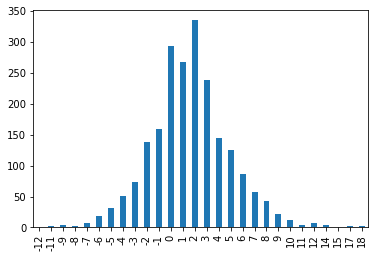

In [29]:
df['sentiment'].value_counts().sort_index().plot(kind='bar') 

In [32]:
len(df[df['sentiment'] > 0])

1351

In [33]:
len(df[df['sentiment'] < 0])

490

In [ ]:
data.to_csv('ngk_data.csv', index=False, encoding="utf-8-sig")